## ML-Model: Random Forest

# import libraries

In [57]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, make_scorer, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# import custom functions

from custom_functions import get_data_summary, our_metrics, eval_metrics, get_f15, get_f2, get_f3

import warnings
warnings.filterwarnings('ignore')
RSEED = 42

In [58]:
#codeline for non-tree models

# X_train_minmax = pd.read_csv('data/X_train_minmax.csv', delimiter=',')
# X_test_minmax = pd.read_csv('data/X_test_minmax.csv', delimiter=',')
# X_train_std = pd.read_csv('data/X_train_std.csv', delimiter=',')
# X_test_std = pd.read_csv('data/X_test_std.csv', delimiter=',')
# y_train = pd.read_csv('data/y_train.csv', delimiter=',')
# y_test = pd.read_csv('data/y_test.csv', delimiter=',')

# Import train-train-split for trees

In [59]:
# Import train-train-split for trees
X_train_tree_small = pd.read_csv('data/X_train_tree_small.csv', delimiter=',')
X_train_tree_large = pd.read_csv('data/X_train_tree_large.csv', delimiter=',')
y_train_tree_small = pd.read_csv('data/y_train_tree_small.csv', delimiter=',')
y_train_tree_large = pd.read_csv('data/y_train_tree_large.csv', delimiter=',')

In [60]:
#reshape y into 2D-array

y_train_tree_small = np.ravel(y_train_tree_small)
y_train_tree_large = np.ravel(y_train_tree_large)

# Import entire data set: test and train data, target

In [61]:
# X_train_tree = pd.read_csv('data/X_train_tree.csv', delimiter=',')
# X_test_tree = pd.read_csv('data/X_test_tree.csv', delimiter=',')
# y_train_tree = pd.read_csv('data/y_train_tree.csv', delimiter=',')
# y_test_tree = pd.read_csv('data/y_test_tree.csv', delimiter=',')

In [62]:
#reshape y into array

# y_test_tree = np.ravel(y_test_tree)
# y_train_tree = np.ravel(y_train_tree)

# Instantiating and training model with default hyperparams

In [65]:
# Create the model with 100 trees
random_forest_default = RandomForestClassifier(n_estimators=500, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1, max_depth=60, min_samples_split=10)

# Fit on small subset of training data
random_forest_default.fit(X_train_tree_small, y_train_tree_small)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished


RandomForestClassifier(max_depth=60, min_samples_split=10, n_estimators=500,
                       n_jobs=-1, random_state=42, verbose=1)

In [66]:
# number of nodes and depths of trees in the forest:

n_nodes = []
max_depths = []

for ind_tree in random_forest_default.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 117699
Average maximum depth 58


# Default hyperpaprams model performance

In [67]:
# predicting target and prediction probabilities with small data subset:

rf_y_pred_train_small = random_forest_default.predict(X_train_tree_small)
rf_y_probs_train_small = random_forest_default.predict_proba(X_train_tree_small)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   13.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   31.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   35.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   13.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   32.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:   37.4s finished


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9372
_____________________
F1-score: 0.3426
_____________________
Fbeta_score with beta=1.5: 0.274
_____________________
Fbeta_score with beta=2: 0.2463
_____________________
Fbeta_score with beta=3: 0.2252
_____________________
Recall 0.2075
_____________________
Specificity 0.9997


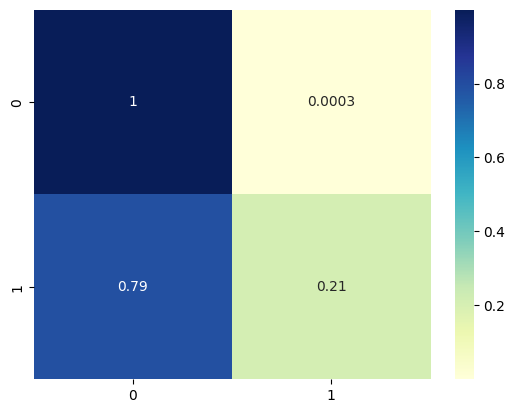

In [68]:
# accuracy matrix: predicted target and true target (small subset of training data)

our_metrics(y_train_tree_small, rf_y_pred_train_small)

In [69]:
# roc-auc-score of train (small subsample)
print(f'Train ROC AUC Score: {roc_auc_score(y_train_tree_small, rf_y_probs_train_small)}')
#print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 0.9942110090670602


In [70]:
# predicting target and prediction probabilities with large data subset:

rf_y_pred_train_large = random_forest_default.predict(X_train_tree_large)
rf_y_probs_train_large = random_forest_default.predict_proba(X_train_tree_large)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   32.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   33.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:  1.5min finished


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9273
_____________________
F1-score: 0.1752
_____________________
Fbeta_score with beta=1.5: 0.1344
_____________________
Fbeta_score with beta=2: 0.1189
_____________________
Fbeta_score with beta=3: 0.1074
_____________________
Recall 0.0979
_____________________
Specificity 0.9983


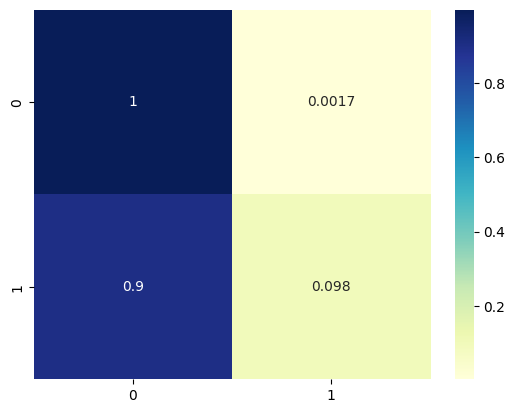

In [71]:
# accuracy matrix: predicted target and true target (large subset of training data)

our_metrics(y_train_tree_large, rf_y_pred_train_large)

In [72]:
# roc-auc-score of test (large subsample)
print(f'Train ROC AUC Score: {roc_auc_score(y_train_tree_large, rf_y_probs_train_large)}')

Train ROC AUC Score: 0.7733384519344966


# RandomizedSearch CV for best Fbeta-Score

In [52]:
# making own scorer to use in random search cross validation
# set beta = 1.5, 2, 3

f15_scorer = make_scorer(fbeta_score, beta=1.5)
f2_scorer = make_scorer(fbeta_score, beta=2)
f3_scorer = make_scorer(fbeta_score, beta=3)

In [53]:
# number of nodes and depths of trees in the forest:

n_nodes = []
max_depths = []

for ind_tree in random_forest_default.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 82106
Average maximum depth 50


In [54]:
# hypeparameters set in default model

random_forest_default.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 1,
 'warm_start': False}

In [55]:
# # Hyperparameter grid
# param_grid = {
#     'n_estimators': (100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000),
#     'max_depth': [None] + list(np.linspace(30, 60, 6).astype(int)),
#     'max_features': ['auto', 'sqrt', None] + list(np.arange(0.1)),
#     'min_samples_split': np.linspace(10, 100, 10).astype(int),
#     'min_samples_leaf': np.linspace(5, 50, 10).astype(int),
#     'bootstrap': [True, False]
# }

# # Estimator for use in random search
# estimator = RandomForestClassifier(random_state = RSEED)

# # Create the random search model
# random_forest_rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
#                         scoring = f15_scorer, cv = 3, 
#                         n_iter = 10, verbose = 5, random_state=RSEED)

# # cv = cross validation

# # Fit 
# random_forest_rs.fit(X_train_tree_small, y_train_tree_small)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 3/3] END bootstrap=False, max_depth=54, max_features=0.0, min_samples_leaf=15, min_samples_split=100, n_estimators=600;, score=nan total time=   1.3s
[CV 1/3] END bootstrap=False, max_depth=54, max_features=0.0, min_samples_leaf=15, min_samples_split=100, n_estimators=600;, score=nan total time=   1.4s
[CV 2/3] END bootstrap=False, max_depth=54, max_features=0.0, min_samples_leaf=15, min_samples_split=100, n_estimators=600;, score=nan total time=   1.4s


/Users/annastein/neuefische/fraud_detection_electricity_company/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/annastein/neuefische/fraud_detection_electricity_company/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/annastein/neuefische/fraud_detection_electricity_company/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been depr

KeyboardInterrupt: 

In [ ]:
# # Best score
# print('Best score:', round(rs_beta.best_score_,2))

# # Best parameters
# print('Best parameters:', rs_beta.best_params_)

In [ ]:
# # Assigning the fitted SGDClassifier model with best parameter combination to a new variable sgd_best
# best_model_beta = rs_beta.best_estimator_

In [ ]:
# # checking results on test set with threshold <= 0.4
# class_metrics_var_threshold(best_model_beta, X_test_preprocessed, y_test, threshold=0.5)

In [ ]:


# does the purchase timing throughout the year affect the price? 
# are there price differences between the desired neighborhood and others?

# plot the relationship between price/sqm and month sold, hue social neighborhood:

# Set custom color palette
colors = ['#7b3294','#a6dba0']
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

# Create a scatterplot for categorical variables using catplot:
timing_plot = sns.catplot(
    data=df_kc_clean,
    x='month_sold', y='price_sqm_living', hue='social_ngh',
    jitter=True, 
    palette=customPalette,
    legend=False
    )

# set figure properties
timing_plot.fig.set_size_inches(15,5)
timing_plot.fig.suptitle('Does Timing Matter?', y=(1.05), size=22, color='#7b3294');
timing_plot.add_legend(title='Social Neighborhood')
timing_plot.set_axis_labels('Month of Property Selling','Price/sqm Living Area in US$', fontsize=12)

# save figure as .jpg to include in presentation
timing_plot.savefig("figures/timing.jpg")

# display plot
plt.show(timing_plot)

